In [1]:
import sys
sys.path.append('../../')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib widget

from scripts.utils import data_path, set_mpl, read_hamelin
set_mpl()



energy, weather, metadata, twitter, trends = read_hamelin()


../..
matplotlib settings set
matplotlib settings set

    Loading Hamelin data from ../../0_data/.
    Houses number removed: 6, 17, 24, 25. 
    Houses with PV: ['13', '15', '26', '33'] 
    HOUSEHOLD and HEATPUMP energy consumption are separated. 
    Resolution: 60min 

    May-June 2019 data for home #34 excluded 
    Data before 2018-05-18 excluded (gaps)
    Data with zero difference between consecutive values dropped (malfunction)

    reutrns:
    df_energy: pd.DataFrame with energy consumption data
    df_weather: pd.DataFrame with weather data
    df_metadata: pd.DataFrame with metadata
    df_twitter: pd.DataFrame with twitter data
    df_trends: pd.DataFrame with trends data

    


In [4]:
HOME_mean =  energy.loc[:, energy.columns.str.contains('HOME')].mean(axis=1).resample('1D').mean()
TOT_mean =  energy.loc[:, energy.columns.str.contains('TOT')].mean(axis=1).resample('1D').mean()
HEAT_mean =  energy.loc[:, energy.columns.str.contains('HEAT')].mean(axis=1).resample('1D').mean()
substation =  energy.loc[:, energy.columns.str.contains('substation')].resample('1D').mean()

HOME_mean = (HOME_mean - HOME_mean.mean()) / HOME_mean.std()
TOT_mean = (TOT_mean - TOT_mean.mean()) / TOT_mean.std()
HEAT_mean = (HEAT_mean - HEAT_mean.mean()) / HEAT_mean.std()
substation = (substation - substation.mean()) / substation.std()


HOME_mean = HOME_mean.rename('HOME').to_frame()
TOT_mean = TOT_mean.rename('TOT').to_frame()
HEAT_mean = HEAT_mean.rename('HEAT').to_frame()
substation = substation




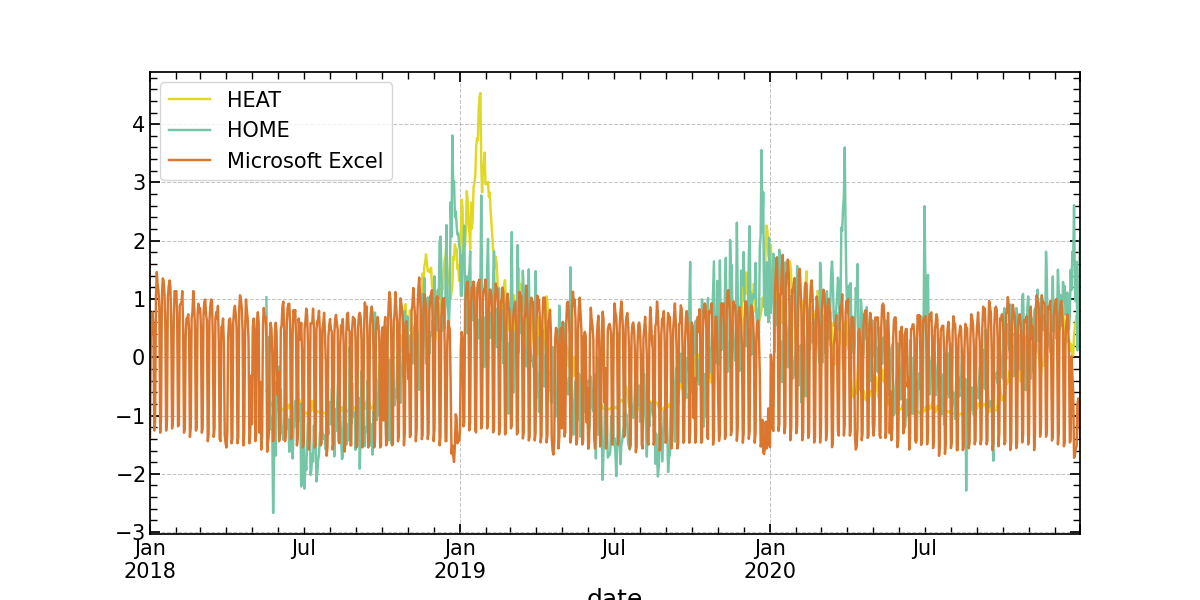

In [7]:
fig,  ax =  plt.subplots( figsize = (12,6))
#ax.plot(HOME_mean.index, HOME_mean.values, label = 'HOME')


HEAT_mean.plot(ax=ax,)
HOME_mean.plot(ax=ax,)
trends['Microsoft Excel'].plot(ax=ax)


ax.legend()


In [17]:
#make a dataframe with all google trends and calculate the cross-correlation coefficients with the energy data (HOME, TOT, HEAT, substation)

trends = trends.resample('1D').mean()

corr_df = pd.DataFrame()

for trend in trends.columns[:]:
    trend_series = trends[trend]

    corr_df[trend] = [trend_series.corr(HOME_mean['HOME']),
                        trend_series.corr(TOT_mean['TOT']),
                        trend_series.corr(HEAT_mean['HEAT']),
                        trend_series.corr(substation['P_substation'])]
corr_df.index = ['HOME', 'TOT', 'HEAT', 'substation']


/var/folders/hk/rctb6p8n16nbrbnjrwzrc8680000gp/T/ipykernel_11617/463724446.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  corr_df[trend] = [trend_series.corr(HOME_mean['HOME']),
/var/folders/hk/rctb6p8n16nbrbnjrwzrc8680000gp/T/ipykernel_11617/463724446.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  corr_df[trend] = [trend_series.corr(HOME_mean['HOME']),
/var/folders/hk/rctb6p8n16nbrbnjrwzrc8680000gp/T/ipykernel_11617/463724446.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of c

In [23]:
corr_df

,Academic year,Address,BT Email,BT Group,Bachelor's degree,Board of education,Box office,Canvas,Chair,Closure,College,Comcast,Comcast Corp,Complaint,Continuing education,Course,Desk,Disposable email address,Distance education,Download,Driving school,Education,Education Perfect,Education minister,Education policy,Email address,Fee,"Global Services, Ltd",Gmail,GoDaddy Inc,Google Account,Google Classroom,Google Docs,Google Docs Editors,Google Drive,Google Forms,Google Sheets,Google Slides,Grammarly,Gratis,Higher education,Inbox by Gmail,India Post,Installation,Learning,Los Angeles Unified School District,Macintosh,Mail,Medical school,Met Office,Microsoft,Microsoft 365,Microsoft Corporation,Microsoft Excel,Microsoft Office,Microsoft Office 2007,Microsoft Office 2010,Microsoft Office 2013,Microsoft Office 2016,Microsoft Office 2019,Microsoft Outlook,Microsoft Teams,Microsoft Windows,Microsoft Word,Middle school,Minecraft: Education Edition,Minister,National Education Policy 2020,National Health Service,Office,Office chair,Office suite,Online school,Outlook.com,Page,Password,Phishing,Physical education,Post Office Limited,Post office,Primary school,Product,Product key,Resignation,School,School Backpack,School district,School holiday,School of education,School shooting,Secondary school,Sex Education,Sex Education - Season 2,Sex Education - Season 3,Seznam.cz,Shooting,Sky,Small office/home office,Social Security Administration,Software,Special education,Strikethrough,Student,Subscript and superscript,Teacher,Template,The ODP Corporation,The Office,Twelfth Grade,United States Postal Service,User Account,Windows 10,Writing,Xfinity,macOS,new,school holiday
HOME,-0.394486,-0.295869,0.033559,-0.013234,-0.113193,0.040440,0.087791,-0.089378,0.392065,-0.074725,-0.340179,-0.023960,-0.023244,-0.137998,-0.244546,-0.202841,0.282006,-0.056268,0.011312,0.357560,-0.477323,-0.324250,0.042951,0.055067,0.052814,-0.175618,-0.233376,0.035275,-0.191835,-0.023091,0.133900,0.108912,-0.121266,-0.037209,-0.225922,-0.030381,-0.342198,-0.134359,-0.172022,0.327601,-0.126766,0.019998,-0.046627,0.442039,-0.124728,0.006956,0.326122,-0.127464,-0.041121,-0.036370,0.020012,-0.116932,-0.073935,-0.275112,0.109293,0.085706,0.021885,0.003350,0.085866,0.261620,-0.288377,-0.196865,0.192426,-0.241462,-0.110628,0.096886,0.131011,0.044758,0.062109,-0.360337,0.202365,0.085106,0.052434,-0.206522,0.062644,0.166608,-0.076193,-0.001376,-0.064997,-0.024787,-0.164435,-0.118916,0.386423,-0.040805,-0.091290,-0.108608,0.007846,-0.028643,-0.033872,-0.036533,-0.089536,0.179845,0.137832,-0.022529,-0.227016,0.022349,0.157778,-0.045486,-0.029520,0.008880,-0.203165,-0.139492,-0.287724,-0.062730,-0.145619,-0.106430,-0.158154,0.026552,0.019042,0.051931,0.236948,0.296255,-0.178974,-0.041701,0.368786,0.164215,-0.178815
TOT,-0.343709,-0.004167,0.025372,0.115942,0.197973,0.005422,0.087483,0.009787,0.252941,-0.038844,-0.195690,-0.013231,-0.019019,-0.032883,0.135280,0.036174,0.242672,-0.054621,0.046252,0.209754,-0.228229,0.032304,0.096227,0.060536,0.008249,0.072452,0.031499,0.138085,-0.013598,0.050280,-0.051280,0.144154,-0.001210,-0.020709,-0.107352,0.018162,-0.138448,0.067647,-0.118690,0.068979,-0.034490,0.078740,0.004414,0.474669,0.064932,-0.003231,0.281851,-0.036844,0.012758,0.006995,0.196855,0.088085,0.107757,0.049053,0.379755,0.203837,0.209205,0.154536,0.348664,0.406709,-0.031445,-0.131250,0.450363,0.025051,-0.100561,0.060221,0.120297,0.025427,0.069608,-0.104598,0.229720,0.191854,0.015820,0.050541,0.005313,0.378801,0.076597,0.190563,0.000002,0.003265,0.040147,0.000376,0.381016,-0.013935,0.085474,-0.037651,0.063276,0.050030,0.000936,-0.025666,0.061949,0.430714,0.337813,0.006220,-0.087108,0.024616,0.191147,-0.047196,-0.005380,0.292371,-0.011481,-0.031704,-0.171012,-0.031586,0.043290,0.055661,-0.018262,-0.050998,0.022184,0.156836,-0.013001,0.452935,0.052492,-0.040214,0.333455,0.092229,-0.001229
HEAT,-0.329233,0.021450,0.023652,0.123183,0.219301,0.002144,0.085429,0.018055,0.232333,-0.034265,-0.17699